In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline

## Data extraction

#### Download a publicly available dataset.
This dataset is available at: https://data.boston.gov/dataset/property-assessment/resource/8de4e3a0-c1d2-47cb-8202-98b9cbe3bd04



In [6]:
url = "https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/8de4e3a0-c1d2-47cb-8202-98b9cbe3bd04/download/data2020-full.txt"
df=pd.read_csv(url) 
df.head()

/Users/anthony/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (6,15,27,28,29,34,35,36,37,38,39,40,41,42,44,45,46,47,48,58,59,64,65,66,67,68,69,70,72,73,74) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,100271002,100271000.0,100271000,356,PRINCETON,ST,1,2128.0,102,CD,...,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.0,N - Normal,G - Good,A - Average
1,100271004,100271000.0,100271000,356,PRINCETON,ST,2,2128.0,102,CD,...,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.0,N - Normal,G - Good,A - Average
2,100271006,100271000.0,100271000,356,PRINCETON,ST,3,2128.0,102,CD,...,NaN,NaN,F - Full Eat In,M - Modern,W - Ht Water/Steam,N - None,0.0,N - Normal,G - Good,A - Average
3,100272000,NaN,100272000,352,PRINCETON,ST,NaN,2128.0,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100273000,NaN,100273000,,PRINCETON,ST,NaN,2128.0,132,RL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Describe the dataset

The description file is at this address: https://data.boston.gov/dataset/property-assessment/resource/bac18ae6-b8fd-4cd3-a61c-c5e1a11f716c

In short, I selected some columns that I will use in this project:

It follows this format: Column  :  Description

PID:  Unique 10-digit parcel number. First 2 digits are the ward, digits 3 to 7 are the parcel, and digits 8 to 10 are the sub-parcel.

AV_TOTAL: Total assessed value for property          



#### Describe what question you intend to answer with the dataset

To focus on the house price, this data will be examined whether a correlation exist between the tax price and the house area.

## Data cleanup

Dropping some columns that seems to be not essential for our ayalysis.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175052 entries, 0 to 175051
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PID             175052 non-null  int64  
 1   CM_ID           85019 non-null   float64
 2   GIS_ID          175052 non-null  int64  
 3   ST_NUM          175052 non-null  object 
 4   ST_NAME         175052 non-null  object 
 5   ST_NAME_SUF     172711 non-null  object 
 6   UNIT_NUM        74737 non-null   object 
 7   ZIPCODE         175043 non-null  float64
 8   PTYPE           175052 non-null  int64  
 9   LU              175052 non-null  object 
 10  OWN_OCC         175052 non-null  object 
 11  OWNER           175052 non-null  object 
 12  MAIL_ADDRESSEE  40723 non-null   object 
 13  MAIL_ADDRESS    175033 non-null  object 
 14  MAIL CS         175052 non-null  object 
 15  MAIL_ZIPCODE    175011 non-null  object 
 16  AV_LAND         175052 non-null  int64  
 17  AV_BLDG   

In [10]:
df.drop(df.iloc[:, 26:], inplace = True, axis = 1) 
df=df.drop(['MAIL_ADDRESSEE','MAIL_ZIPCODE','MAIL_ADDRESS', 'MAIL CS','OWNER','PID', 'CM_ID','GIS_ID','ST_NUM','UNIT_NUM'], axis=1)
df

,ST_NAME,ST_NAME_SUF,ZIPCODE,PTYPE,LU,OWN_OCC,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS
0,PRINCETON,ST,2128.0,102,CD,Y,0,364700,364700,3851.23,0,1900.0,2018.0,791.0,791.0,1.0
1,PRINCETON,ST,2128.0,102,CD,Y,0,373400,373400,3943.10,0,1900.0,2018.0,799.0,799.0,1.0
2,PRINCETON,ST,2128.0,102,CD,N,0,394400,394400,4164.86,0,1900.0,2018.0,908.0,908.0,1.0
3,PRINCETON,ST,2128.0,105,R3,Y,349800,355900,705700,7452.19,5000,1900.0,NaN,3632.0,2404.0,2.5
4,PRINCETON,ST,2128.0,132,RL,N,38400,0,38400,405.50,1900,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175047,LAKE SHORE,RD,2135.0,995,CM,N,0,0,0,0.00,0,1999.0,1999.0,NaN,NaN,2.0
175048,UNDINE,RD,2135.0,995,CM,N,0,0,0,0.00,0,1935.0,2001.0,NaN,NaN,2.0
175049,KENRICK,ST,2135.0,995,CM,N,0,0,0,0.00,0,1930.0,2001.0,NaN,NaN,2.0
175050,KENRICK,ST,2135.0,995,CM,N,0,0,0,0.00,0,1999.0,1999.0,NaN,NaN,2.0


#### Throwing away some rows with empty values

In [11]:
df = df[df.GROSS_TAX != 0] 
df = df[df.AV_TOTAL != 0] 
df = df[df.YR_BUILT !=0] 
df=df.dropna()
df

,ST_NAME,ST_NAME_SUF,ZIPCODE,PTYPE,LU,OWN_OCC,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS
0,PRINCETON,ST,2128.0,102,CD,Y,0,364700,364700,3851.23,0,1900.0,2018.0,791.0,791.0,1.0
1,PRINCETON,ST,2128.0,102,CD,Y,0,373400,373400,3943.10,0,1900.0,2018.0,799.0,799.0,1.0
2,PRINCETON,ST,2128.0,102,CD,N,0,394400,394400,4164.86,0,1900.0,2018.0,908.0,908.0,1.0
5,PRINCETON,ST,2128.0,109,R3,N,0,745300,745300,7870.37,0,1900.0,2014.0,4398.0,2772.0,2.0
8,SHELBY,ST,2128.0,105,R3,Y,202700,387900,590600,6236.73,1250,1890.0,1991.0,3520.0,2244.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170763,LAKE,ST,2135.0,101,R1,Y,285200,398300,683500,7217.75,6441,1920.0,1991.0,2906.0,1612.0,2.0
170764,LAKE,ST,2135.0,101,R1,Y,251100,635400,886500,9361.43,4305,1910.0,2017.0,4482.0,2302.0,2.0
170765,LAKE,ST,2135.0,104,R2,Y,284200,700300,984500,10396.31,4020,1910.0,1995.0,4549.0,2545.0,2.0
170773,LAKE,ST,2135.0,105,R3,N,417800,676600,1094400,11556.86,7380,1920.0,1990.0,4291.0,2834.0,2.5


## Data visualization

In [13]:
df = df.astype({"YR_BUILT": int,'ZIPCODE':int})
df.describe(include='all')

,ST_NAME,ST_NAME_SUF,ZIPCODE,PTYPE,LU,OWN_OCC,AV_LAND,AV_BLDG,AV_TOTAL,GROSS_TAX,LAND_SF,YR_BUILT,YR_REMOD,GROSS_AREA,LIVING_AREA,NUM_FLOORS
count,77587,77587,77587.000000,77587.000000,77587,77587,7.758700e+04,7.758700e+04,7.758700e+04,7.758700e+04,7.758700e+04,77587.000000,77587.000000,7.758700e+04,7.758700e+04,77587.000000
unique,2923,27,NaN,NaN,12,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,COMMONWEALTH,ST,NaN,NaN,CD,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3245,54044,NaN,NaN,44289,38875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2128.804697,109.969479,NaN,NaN,2.728071e+05,1.028948e+06,1.301755e+06,2.025133e+04,3.736983e+03,1915.292729,1998.430175,4.436371e+03,3.631037e+03,1.790919
std,NaN,NaN,28.953733,48.241815,NaN,NaN,3.055699e+06,8.091501e+06,1.059395e+07,2.581056e+05,3.167234e+04,32.921583,18.811722,2.948627e+04,2.691486e+04,1.303594
min,NaN,NaN,2018.000000,13.000000,NaN,NaN,0.000000e+00,0.000000e+00,2.545800e+04,3.178600e+02,0.000000e+00,1700.000000,0.000000,1.000000e+00,0.000000e+00,0.000000
25%,NaN,NaN,2118.000000,102.000000,NaN,NaN,0.000000e+00,3.637000e+05,4.302000e+05,4.597820e+03,0.000000e+00,1899.000000,1985.000000,8.240000e+02,8.190000e+02,1.000000
50%,NaN,NaN,2127.000000,102.000000,NaN,NaN,0.000000e+00,5.045000e+05,5.972000e+05,6.414140e+03,0.000000e+00,1905.000000,2002.000000,1.503000e+03,1.325000e+03,1.000000
75%,NaN,NaN,2131.000000,104.000000,NaN,NaN,2.007000e+05,7.570000e+05,8.847000e+05,9.685105e+03,3.675000e+03,1925.000000,2011.000000,3.832000e+03,2.550000e+03,2.000000


#### Data Exploration: Look at the histogram of house prices in houses with property taxes less than 50,000

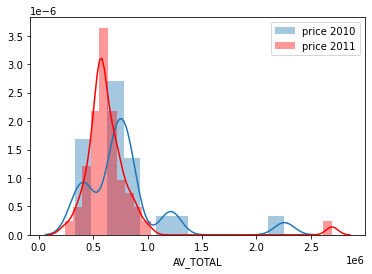

In [14]:
X= tax_2010 = df.loc[(df['YR_BUILT']==2010)&(df.GROSS_TAX<50000.0), 'AV_TOTAL']
y= tax_2011 = df.loc[(df['YR_BUILT']==2011)&(df.GROSS_TAX<50000.0) ,'AV_TOTAL'] 

sns.distplot(tax_2010)
sns.distplot(tax_2011, color='red')
plt.legend(['price 2010', 'price 2011'])

## Descriptive/Predictive analytics 

### T Test

In [16]:
from statsmodels.stats import weightstats as weightstats 
weightstats.ttest_ind(x1=tax_2010, x2=tax_2011, alternative='larger')

(1.5067155721835164, 0.06819167769441954, 70.0)

### Z Test

In [17]:
weightstats.ztest(x1=tax_2010, x2=tax_2011)

(1.5067155721835164, 0.13188357829694755)

### Linear Model(OSL)

Try to find the relationship between house price and house size using Linear Model

In [19]:
 import statsmodels.formula.api as smf


results_1 = smf.ols('AV_TOTAL ~ GROSS_AREA', data = df).fit() 
print(results_1.params)
results_1.summary()
 

Intercept    -163677.894952
GROSS_AREA       330.322475
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               AV_TOTAL   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 4.239e+05
Date:                Mon, 01 Mar 2021   Prob (F-statistic):               0.00
Time:                        02:13:40   Log-Likelihood:            -1.2927e+06
No. Observations:               77587   AIC:                         2.585e+06
Df Residuals:                   77585   BIC:                         2.585e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.637e+05   1.51e+04    -10.819      0.000   -1.93e+05   -1.34e+05
GROSS_AREA   330.3225      0.507    651.050      0.000     329.328     331.317
==============================================================================
Omnibus:                   152449.050   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      36452755505.761
Skew:                         -14.042   Prob(JB):                         0.00
Kurtosis:                    3360.849   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Trend of price with gross area')

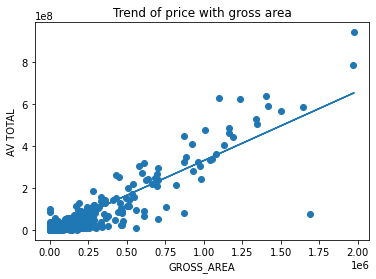

In [21]:
plt.scatter(df.GROSS_AREA, df.AV_TOTAL)     
plt.plot(df.GROSS_AREA, results_1.fittedvalues) 
plt.xlabel('GROSS_AREA')
plt.ylabel('AV TOTAL')
plt.title('Trend of price with gross area')

It can be seen from the figure that the house price and the house area are positively correlated. 

However, there are still many points squeezed in the lower left corner. The possible reason is that there are many houses with a small area (that is, no value scaling is done. Without limiting the value range of several columns to a certain range, the column with a large value that has a greater impact on the model).